In [74]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
excel_files = glob.glob("*.xlsx")
file = excel_files[0]
df = pd.read_excel(file)

In [25]:
cols = ['Auftrag'] + [col for col in df.columns if col.__contains__('KW')]
df_relevant = df[cols]
print(df_relevant.shape)
for col in df_relevant.columns:
    new_col = col.replace('\n', '_')
    df_relevant.rename(columns={col:new_col}, inplace=True)
df_relevant.head()

(712, 209)


/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_4473/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.rename(columns={col:new_col}, inplace=True)
/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_4473/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.rename(columns={col:new_col}, inplace=True)
/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_4473/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Auftrag,KW 01,KW 02_2020,KW 03_2020,KW 04,KW 05,KW 06,KW 07,KW 08,KW 09,...,2023_KW43,2023_KW44,2023_KW45,2023_KW46,2023_KW47,2023_KW48,2023_KW49,2023_KW50,2023_KW51,2023_KW52
0,Technisches Büro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SBF Frankfurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STB Sontheim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA Würzburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
arbeitsbereiche = ['Kapazität PR-Fertigung', 'Kapazität Fensterfertigung',
                   'Kapazität Türfertigung', 'Kapazität Blechfertigung', 'Kapazität Abt. Schweißen', 'Kapazität Rollen']

row_nums = list()
for ab in arbeitsbereiche:
    rownum = df_relevant.loc[df_relevant['Auftrag'] == ab].index
    row_nums.append(rownum[0])

print(row_nums)
    
df_pr = df_relevant.iloc[row_nums[0]-1:row_nums[0]+1].dropna(axis=1, how='all').transpose().stack().reset_index()[1:]
df_pr.rename(columns={'level_0':'KW', 'level_1': 'category', 0: 'value'}, inplace=True)
df_pr.replace(208, 'Kapazität', inplace=True)
df_pr.replace(207, 'Auslastung', inplace=True)

df_f = df_relevant.iloc[row_nums[1]-1:row_nums[1]+1].dropna(axis=1, how='all').transpose()[1:]
df_f.rename(columns={'level_0':'KW', 'level_1': 'category', 0: 'value'}, inplace=True)
df_f.replace(281, 'Kapazität', inplace=True)
df_f.replace(282, 'Auslastung', inplace=True)

df_t = df_relevant.iloc[row_nums[2]-1:row_nums[2] +
                        1].dropna(axis=1, how='all').transpose()[1:]
df_t.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_t.replace(345, 'Kapazität', inplace=True)
df_t.replace(346, 'Auslastung', inplace=True)

df_b = df_relevant.iloc[row_nums[3]-1:row_nums[3]+1].dropna(axis=1, how='all').transpose()[1:]
df_b.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_b.replace(391, 'Kapazität', inplace=True)
df_b.replace(392, 'Auslastung', inplace=True)

df_s = df_relevant.iloc[row_nums[4]-1:row_nums[4]+1].dropna(axis=1, how='all').transpose()[1:]
df_s.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_s.replace(402, 'Kapazität', inplace=True)
df_s.replace(403, 'Auslastung', inplace=True)

df_r = df_relevant.iloc[row_nums[5]-1:row_nums[5]+1].dropna(axis=1, how='all').transpose()[1:]
df_r.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_r.replace(449, 'Kapazität', inplace=True)
df_r.replace(450, 'Auslastung', inplace=True)

df_pr

[208, 282, 346, 392, 403, 450]


,KW,category,value
1,KW 01,Kapazität,0.00
2,KW 17.1,Auslastung,131.28
3,KW 18.1,Auslastung,0.00
4,KW 19.1,Auslastung,0.00
5,KW 20.1,Auslastung,0.00
...,...,...,...
223,2023_KW50,Kapazität,54.50
224,2023_KW51,Auslastung,0.00
225,2023_KW51,Kapazität,54.50
226,2023_KW52,Auslastung,0.00


In [71]:
data = df_pr.loc[df_pr.KW.isin(['2022_KW44', '2022_KW45','2022_KW46','2022_KW47', '2022_KW48','2022_KW49'])]

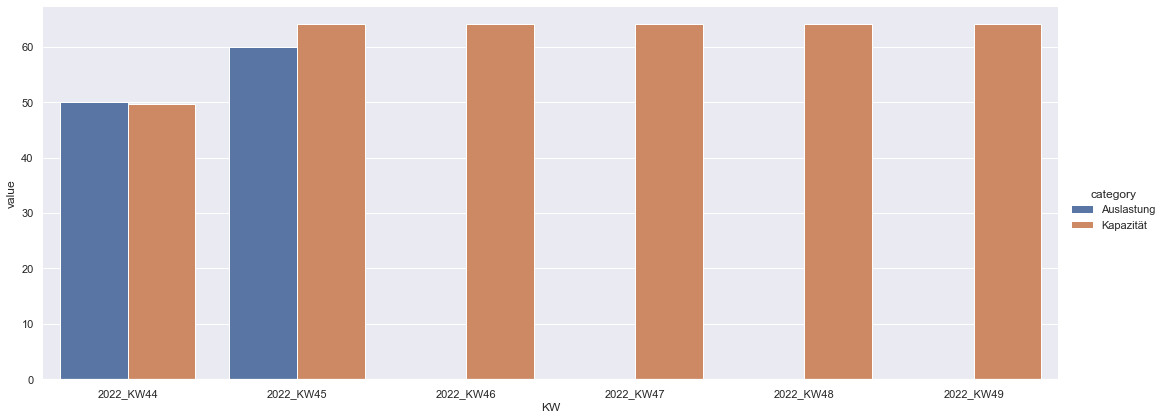

In [90]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
g = sns.catplot(data=data, kind='bar', x='KW', y='value', hue='category', height=6, aspect=2.5)
g.set_titles("Pfosten-Riegel")
g.despine(left=True)
